# Task : <br>Extract reviews of any product from ecommerce website like amazon

## I scraped reviews of OnePlus-Nord-Shadow-128GB from amazon website. Then I performed Sentiment analysis on it. At last I predicting their values using Linear SVM, RF & Logistic Regression.

In [183]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import nltk
from wordcloud import WordCloud

## Applying Web Scraping

In [184]:
# "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
def get_soup(url): 
    session = requests.session()
    session.headers['User-Agent'] = "YOUR USER AGENT HERE"
    session.get("https://www.amazon.in/")
    r= session.get(url)
    if r.status_code==200:
        soup=BeautifulSoup(r.text,'html.parser')
    else:
        print("Amazon site response. Error_code:",r.status_code)
    return soup 

In [185]:
# sp=get_soup("https://www.amazon.in/OnePlus-Nord-Shadow-128GB-Storage/product-reviews/B0B3CQBRB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
# sp.find_all('div',{'data-hook':"review"})

### This is only HTML code or Raw data. Now since the core setup is done let us see how scraping for a specific requirement can be done.

In [186]:
def get_reviews(soup):
    page=[]
    cust={}
    reviews=soup.find_all('div',{'data-hook':"review"})
    try:
        for item in reviews:
            cust={
            'UserName':item.find(class_="a-profile-name").text.strip(),
            #'Date':date_extract(item.find("span",{"data-hook":"review-date"}).text),
            'Review Title':item.find('a',{'data-hook':'review-title'}).text.strip(),
           # 'Rating':float(item.find('i',{'data-hook':"review-star-rating"}).text[:3]),
            'Review':item.find('span',{'data-hook':'review-body'}).text.strip()}
            page.append(cust)
    except:
        pass
    return page

In [187]:
#initialization
df=pd.DataFrame()
soup=BeautifulSoup()
x=1
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

### Getting reviews from 20 review pages. Total of 100 reviews scraped

In [189]:
for x in range(1,21):
    print(f"Getting page {x}")
    soup=BeautifulSoup()
    if x==1:
        soup=get_soup(f"https://www.amazon.in/OnePlus-Nord-Shadow-128GB-Storage/product-reviews/B0B3CQBRB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
    else:
        soup=get_soup(f"https://www.amazon.in/OnePlus-Nord-Shadow-128GB-Storage/product-reviews/B0B3CQBRB4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")
    page=get_reviews(soup)
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break
    df=pd.concat([df,pd.DataFrame(page)],axis=0)

Getting page 1
Getting page 2
Getting page 3
Getting page 4
Getting page 5
Getting page 6
Getting page 7
Getting page 8
Getting page 9
Getting page 10
Getting page 11
Getting page 12
Getting page 13
Getting page 14
Getting page 15
Getting page 16
Getting page 17
Getting page 18
Getting page 19
Getting page 20


In [190]:
pd.set_option("display.max_colwidth", 500)
df.head()

,UserName,Review Title,Review
0,ASR,Really a Good Buy in this price range in 2022,"Verdict : A Solid buy for this price segment in 2022 (and even for early 2023)There are 2 reviews in this section. Review 1 is 30 days after purchase (Typos in the Review 1 has rectified now) and Review 2 is 15 days post Android 13 beta update. These reviews are based on my own personal experience of the device purchased here in Amazon on 1 August 2022.Before OOS 13 update, 5G (only for Jio) was enabled via another update. 5G is still not available in my region. Hence, 5G related parameters ..."
1,Amazon user,Expected better Battery,"Overall it's a good mobile phone. The speed and interface is all good but expect battery to last long. Not much, i always keep it in battery saving mode and work for about 18-20 hours on normal use.. not many themes available. Samsung is better in that sense.. there are many wallpapers and themes available. Display is clear and camera is also good! Overall okay."
2,Rama Rao,Over-all a very balanced product.,"I got this mobile (12Gb, 25Gb Ram variant)at 31k after 3k discount on icici credit card.For this price it's a must buy.I am using this product since last 2 weeks.The camera is pretty good and the screen and sterio speakers are also working very well.The only complaint I can say is the battery life could have been better, as a working professional it doesn't makes a lot difference for me but who is a heavy user they will need to charge it twice a day.If you have no issues with the battery sec..."
3,Vinay,Poor Battery life,"Battery drains like any thing. Rest all good.I have to recharge twice a day, don't buy if you want a good battery backup.Even though phone is fast charge, I am disappointed with battery life."
4,ANIKET,Good,"I bought 12gb and 256 and it's working very smoothly, for normal regular use you can go for it."


In [191]:
df.shape

(200, 3)

In [192]:
df.isnull().sum()

UserName        0
Review Title    0
Review          0
dtype: int64

## Data Cleaning

#### Removing Emojis

In [193]:
import re

In [194]:
# text = u'This dog \U0001f602'
# print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def remove_emoji(text):
    text = emoji_pattern.sub(r'', text) # no emoji
    return text

In [195]:
df['Review'] = df['Review'].apply(remove_emoji)
df.head()

,UserName,Review Title,Review
0,ASR,Really a Good Buy in this price range in 2022,"Verdict : A Solid buy for this price segment in 2022 (and even for early 2023)There are 2 reviews in this section. Review 1 is 30 days after purchase (Typos in the Review 1 has rectified now) and Review 2 is 15 days post Android 13 beta update. These reviews are based on my own personal experience of the device purchased here in Amazon on 1 August 2022.Before OOS 13 update, 5G (only for Jio) was enabled via another update. 5G is still not available in my region. Hence, 5G related parameters ..."
1,Amazon user,Expected better Battery,"Overall it's a good mobile phone. The speed and interface is all good but expect battery to last long. Not much, i always keep it in battery saving mode and work for about 18-20 hours on normal use.. not many themes available. Samsung is better in that sense.. there are many wallpapers and themes available. Display is clear and camera is also good! Overall okay."
2,Rama Rao,Over-all a very balanced product.,"I got this mobile (12Gb, 25Gb Ram variant)at 31k after 3k discount on icici credit card.For this price it's a must buy.I am using this product since last 2 weeks.The camera is pretty good and the screen and sterio speakers are also working very well.The only complaint I can say is the battery life could have been better, as a working professional it doesn't makes a lot difference for me but who is a heavy user they will need to charge it twice a day.If you have no issues with the battery sec..."
3,Vinay,Poor Battery life,"Battery drains like any thing. Rest all good.I have to recharge twice a day, don't buy if you want a good battery backup.Even though phone is fast charge, I am disappointed with battery life."
4,ANIKET,Good,"I bought 12gb and 256 and it's working very smoothly, for normal regular use you can go for it."


In [196]:
#importing all the required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [197]:
import contractions

In [198]:
# Expanding contractions
def con(text):
    expand=contractions.fix(text)
    return expand

df.Review=df.Review.apply(con)

In [199]:
def remove_sp(text):
    pattern=r'[^A-Za-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

df.Review=df.Review.apply(remove_sp)
df

,UserName,Review Title,Review
0,ASR,Really a Good Buy in this price range in 2022,Verdict A Solid buy for this price segment in 2022 and even for early 2023There are 2 reviews in this section Review 1 is 30 days after purchase Typos in the Review 1 has rectified now and Review 2 is 15 days post Android 13 beta update These reviews are based on my own personal experience of the device purchased here in Amazon on 1 August 2022Before OOS 13 update 5G only for Jio was enabled via another update 5G is still not available in my region Hence 5G related parameters are not covere...
1,Amazon user,Expected better Battery,Overall it is a good mobile phone The speed and interface is all good but expect battery to last long Not much i always keep it in battery saving mode and work for about 1820 hours on normal use not many themes available Samsung is better in that sense there are many wallpapers and themes available Display is clear and camera is also good Overall okay
2,Rama Rao,Over-all a very balanced product.,I got this mobile 12Gb 25Gb Ram variantat 31k after 3k discount on icici credit cardFor this price it is a must buyI am using this product since last 2 weeksThe camera is pretty good and the screen and sterio speakers are also working very wellThe only complaint I can say is the battery life could have been better as a working professional it does not makes a lot difference for me but who is a heavy user they will need to charge it twice a dayIf you have no issues with the battery section th...
3,Vinay,Poor Battery life,Battery drains like any thing Rest all goodI have to recharge twice a day do not buy if you want a good battery backupEven though phone is fast charge I am disappointed with battery life
4,ANIKET,Good,I bought 12gb and 256 and it is working very smoothly for normal regular use you can go for it
...,...,...,...
5,santanu sar,Ok,No audio jack
6,sn,One of the best in market,Loved it Great design UI is fun to use Highly responsive touch screen and face recognition as well as fingerprint sensor
7,Khajavalli,Great product in this range,Fingerprint is goodBattery is fully charged within 3540 minutesBack cam is good and selfie is somewhat bad
8,Prof Vishal chavan,Superb,Good


In [200]:
stopwords_english =  stopwords.words('english')

emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3' , ':D', '.:D'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [201]:
import string
punctuations=list(string.punctuation)                 # !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

In [202]:
lemmatizer = WordNetLemmatizer()

def clean_data(text):
    text_clean = []
    text_tokens = word_tokenize(text)
    #text_tokens = tokenizer.tokenize(text)    
    for word in text_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #reviews_clean.append(word)
            stem_word = lemmatizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])
    return list_to_str.lower()

In [203]:
df['Review'] = df['Review'].apply(clean_data)

In [204]:
df.head()

,UserName,Review Title,Review
0,ASR,Really a Good Buy in this price range in 2022,verdict a solid buy price segment 2022 even early 2023there 2 review section review 1 30 day purchase typos review 1 rectified review 2 15 day post android 13 beta update these review based personal experience device purchased amazon 1 august 2022before oos 13 update 5g jio enabled via another update 5g still available region hence 5g related parameter covered reviewreview 2 after 15 day oxygen os 13 beta update android 13update received 1 dec 2023note after beta update new issue popped upie...
1,Amazon user,Expected better Battery,overall good mobile phone the speed interface good expect battery last long not much always keep battery saving mode work 1820 hour normal use many theme available samsung better sense many wallpaper theme available display clear camera also good overall okay
2,Rama Rao,Over-all a very balanced product.,i got mobile 12gb 25gb ram variantat 31k 3k discount icici credit cardfor price must buyi using product since last 2 weeksthe camera pretty good screen sterio speaker also working wellthe complaint i say battery life could better working professional make lot difference heavy user need charge twice dayif issue battery section go
3,Vinay,Poor Battery life,battery drain like thing rest goodi recharge twice day buy want good battery backupeven though phone fast charge i disappointed battery life
4,ANIKET,Good,i bought 12gb 256 working smoothly normal regular use go


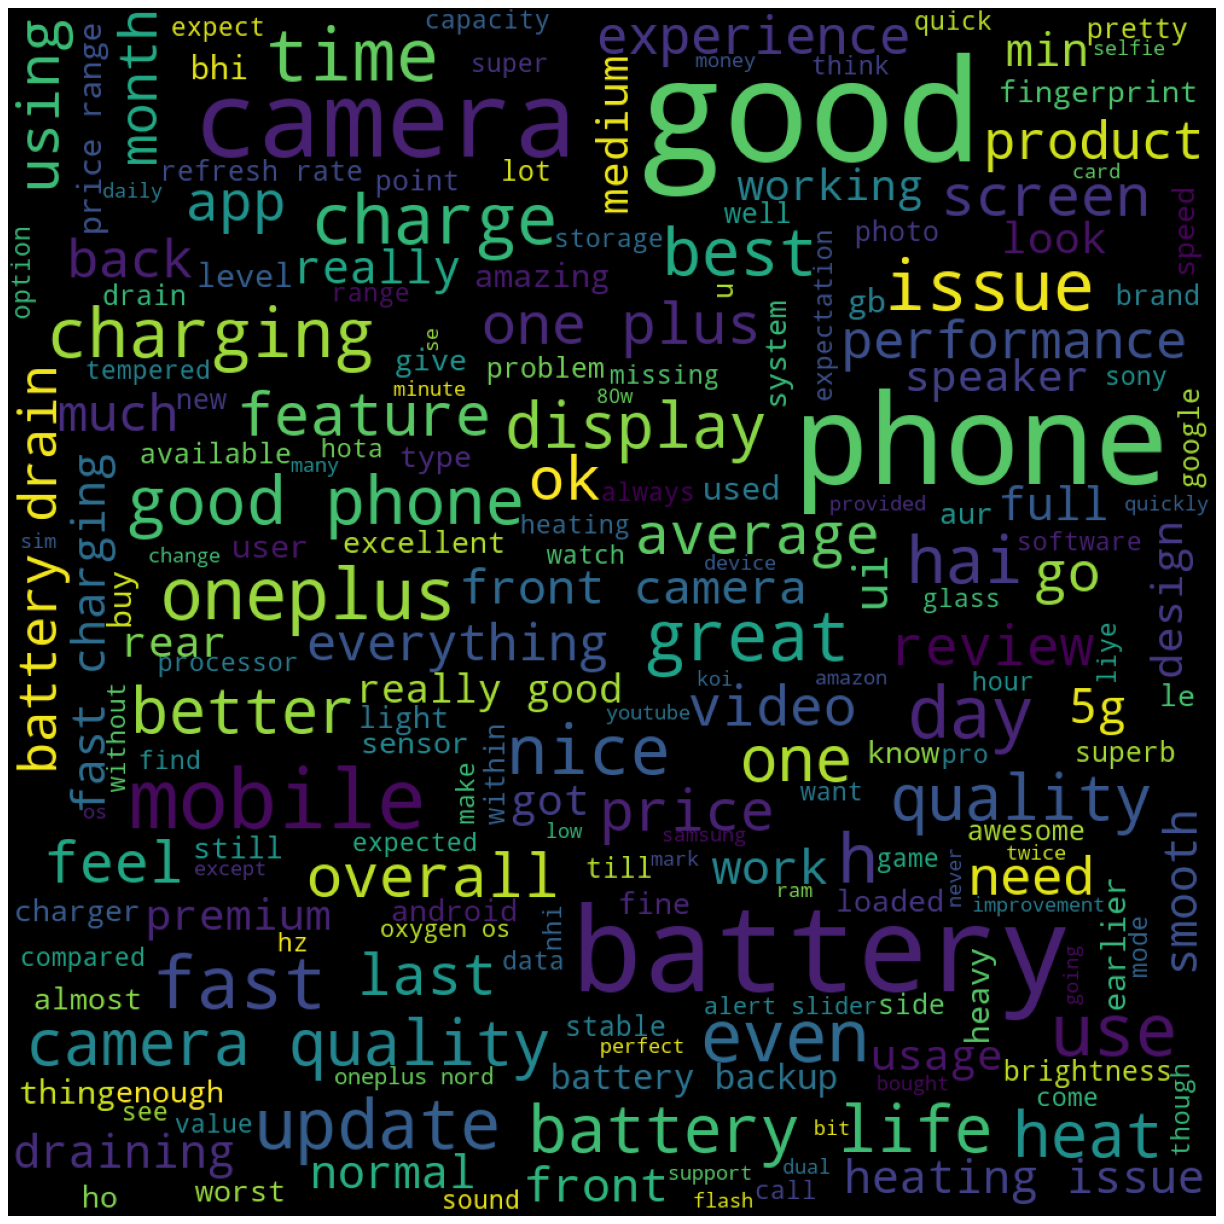

In [205]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df["Review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [206]:
from textblob import TextBlob
import re
import numpy as np

def sentimental_analyze(word):
    '''
    Utility function to classify the polarity 
    using textblob.
    '''
    analysis = TextBlob(word)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [207]:
df['Analysis'] = np.array([ sentimental_analyze(word) for word in df['Review'] ])
# df['Sentiment_Polarity_degree'] = np.array([ TextBlob(word).sentiment for word in df['Content'] ])

In [208]:
mypol=[]
for i in df['Review']:
    mypol.append(TextBlob(i).sentiment.polarity)
#     print(TextBlob(i).sentiment.polarity)
df["score"]=np.array(mypol)

In [209]:
df.head()

,UserName,Review Title,Review,Analysis,score
0,ASR,Really a Good Buy in this price range in 2022,verdict a solid buy price segment 2022 even early 2023there 2 review section review 1 30 day purchase typos review 1 rectified review 2 15 day post android 13 beta update these review based personal experience device purchased amazon 1 august 2022before oos 13 update 5g jio enabled via another update 5g still available region hence 5g related parameter covered reviewreview 2 after 15 day oxygen os 13 beta update android 13update received 1 dec 2023note after beta update new issue popped upie...,Positive,0.150738
1,Amazon user,Expected better Battery,overall good mobile phone the speed interface good expect battery last long not much always keep battery saving mode work 1820 hour normal use many theme available samsung better sense many wallpaper theme available display clear camera also good overall okay,Positive,0.312500
2,Rama Rao,Over-all a very balanced product.,i got mobile 12gb 25gb ram variantat 31k 3k discount icici credit cardfor price must buyi using product since last 2 weeksthe camera pretty good screen sterio speaker also working wellthe complaint i say battery life could better working professional make lot difference heavy user need charge twice dayif issue battery section go,Positive,0.150000
3,Vinay,Poor Battery life,battery drain like thing rest goodi recharge twice day buy want good battery backupeven though phone fast charge i disappointed battery life,Positive,0.050000
4,ANIKET,Good,i bought 12gb 256 working smoothly normal regular use go,Positive,0.075000


In [210]:
df["Analysis"].value_counts()

Positive    162
Neutral      31
Negative      7
Name: Analysis, dtype: int64

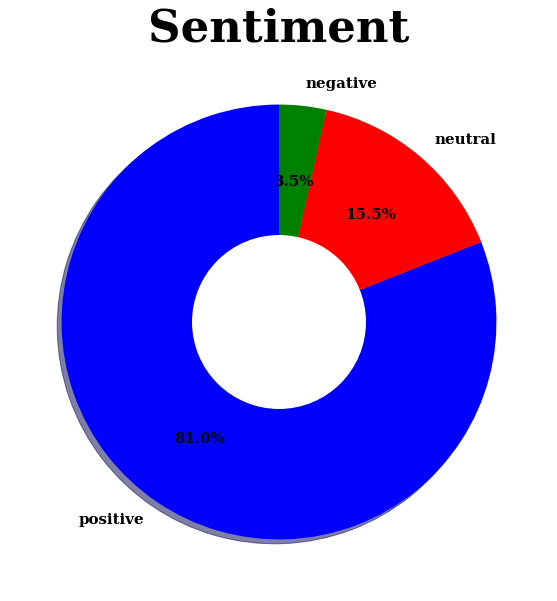

In [211]:
sentiment_data = df['Analysis'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(sentiment_data,
                               colors = ['blue', 'red', 'green',],
                               labels = ['positive', 'neutral', 'negative'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### 78.1% reviews are positive , 4.3% negative and 17.6% neutral

In [212]:
# Top 10 positive Reviews
df_sort = df.sort_values(by = 'score' , ascending= False)
df_sort.head(10)

,UserName,Review Title,Review,Analysis,score
0,Shivam,Nord 2t,superb quality,Positive,1.00
3,Mohd Shams uddin,Awesome one plus,awesome,Positive,1.00
1,Pradeep Yadav,Camera quality is good,superb camera quality,Positive,1.00
5,Shivam Mishra,Best phone,best camera,Positive,1.00
0,Aman,Paisa vasool phone,best phone,Positive,1.00
1,Harshal Patil,Rear camera is superb but not front camera.,rear camera superb front camera,Positive,1.00
6,Mohit raghav,Awesome product value for money,awesome value money,Positive,1.00
8,Prashanth,Very good product.,very good product,Positive,0.91
4,Akram akram,Amazon TQ,very good,Positive,0.91
4,Souravi,Perfectly ok,i happy handset,Positive,0.80


Text(0, 0.5, 'score')

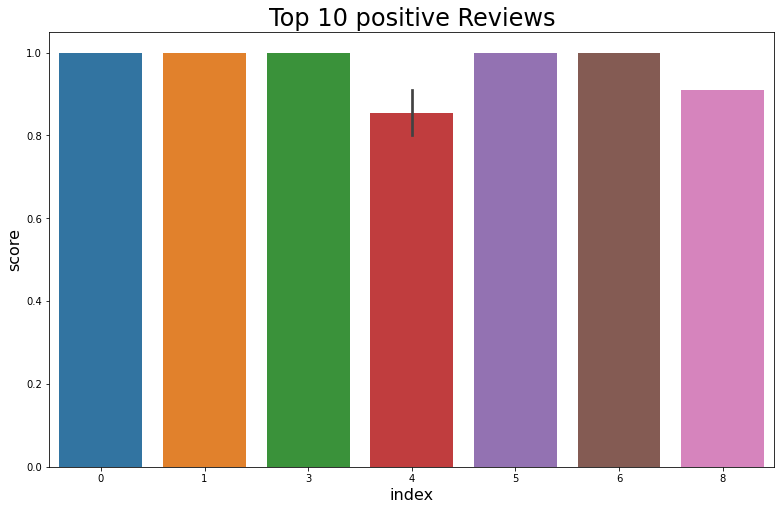

In [213]:
plt.figure(figsize= (13,8))
sns.barplot(x = df_sort.index[0:10] , y = df_sort.score[0:10])
plt.title('Top 10 positive Reviews' , fontsize = 24)
plt.xlabel('index', fontsize = 16)
plt.ylabel('score', fontsize = 16)

Text(0, 0.5, 'score')

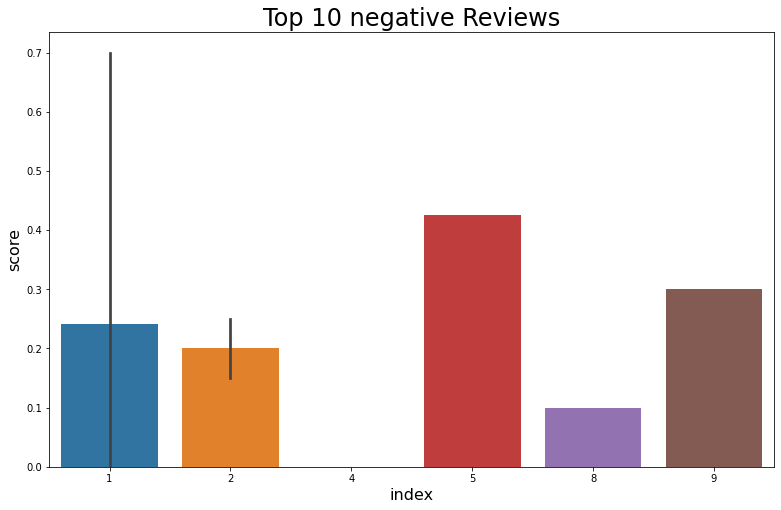

In [214]:
plt.figure(figsize= (13,8))
sns.barplot(x = df_sort.index[:-10:-1] , y = abs(df_sort.score[:-10:-1]))
plt.title('Top 10 negative Reviews' , fontsize = 24)
plt.xlabel('index', fontsize = 16)
plt.ylabel('score', fontsize = 16)

### Generating wordclouds for positive and negative words used in reviews

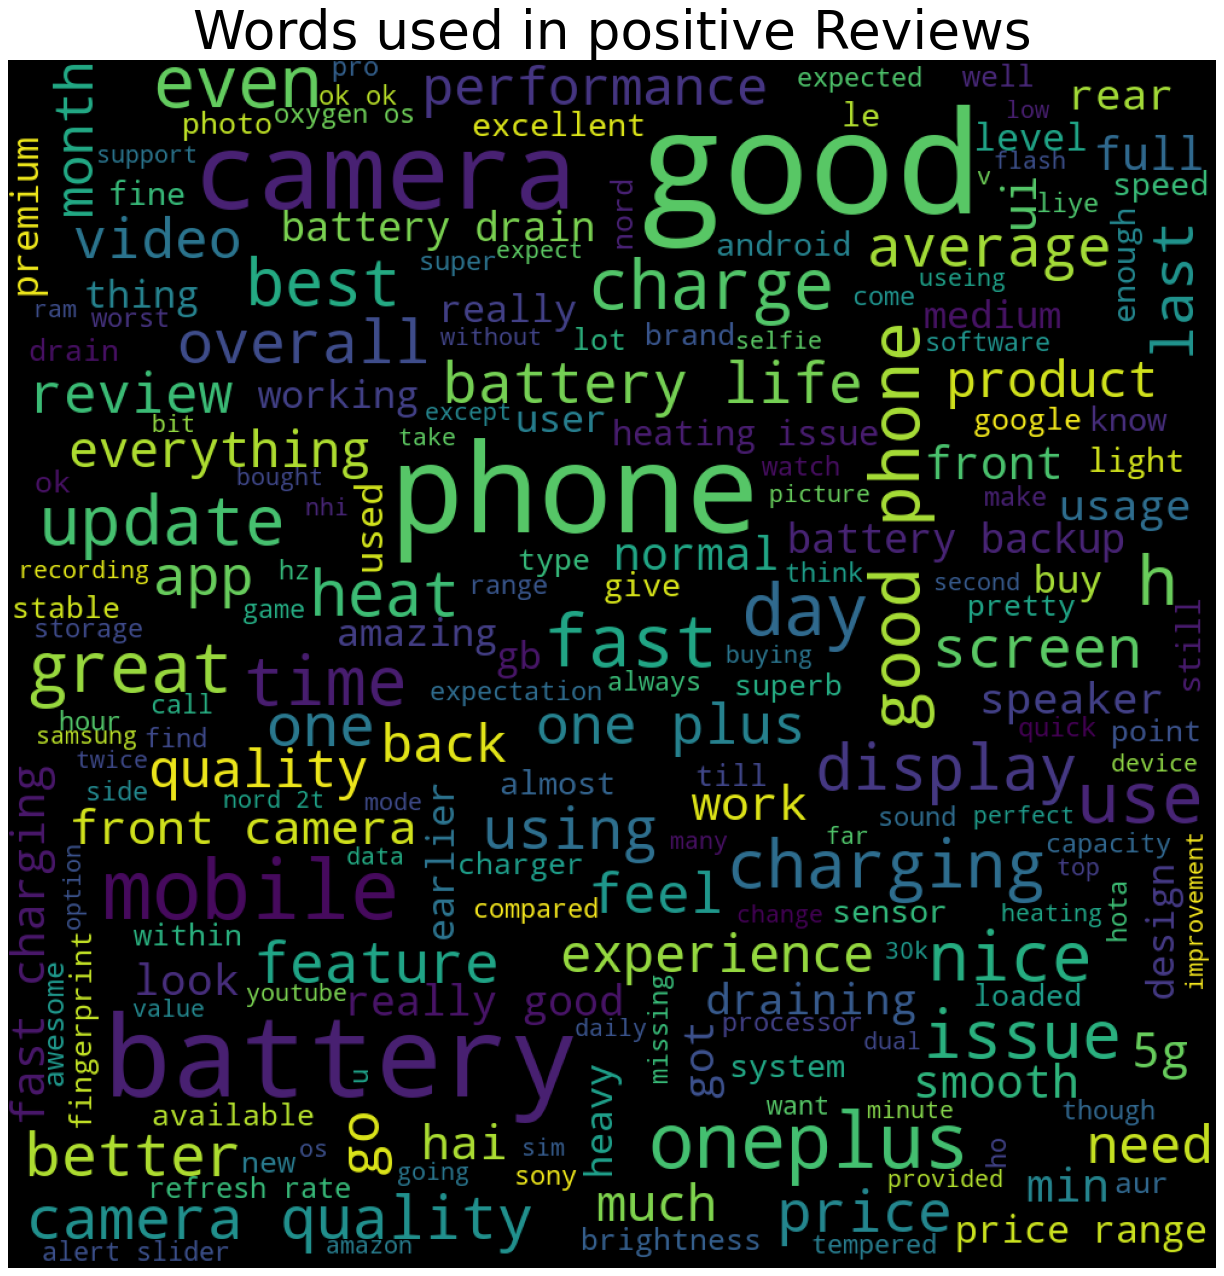

In [215]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df_sort[df_sort['score'] > 0]['Review']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.title('Words used in positive Reviews' , fontsize = 48)
plt.show()

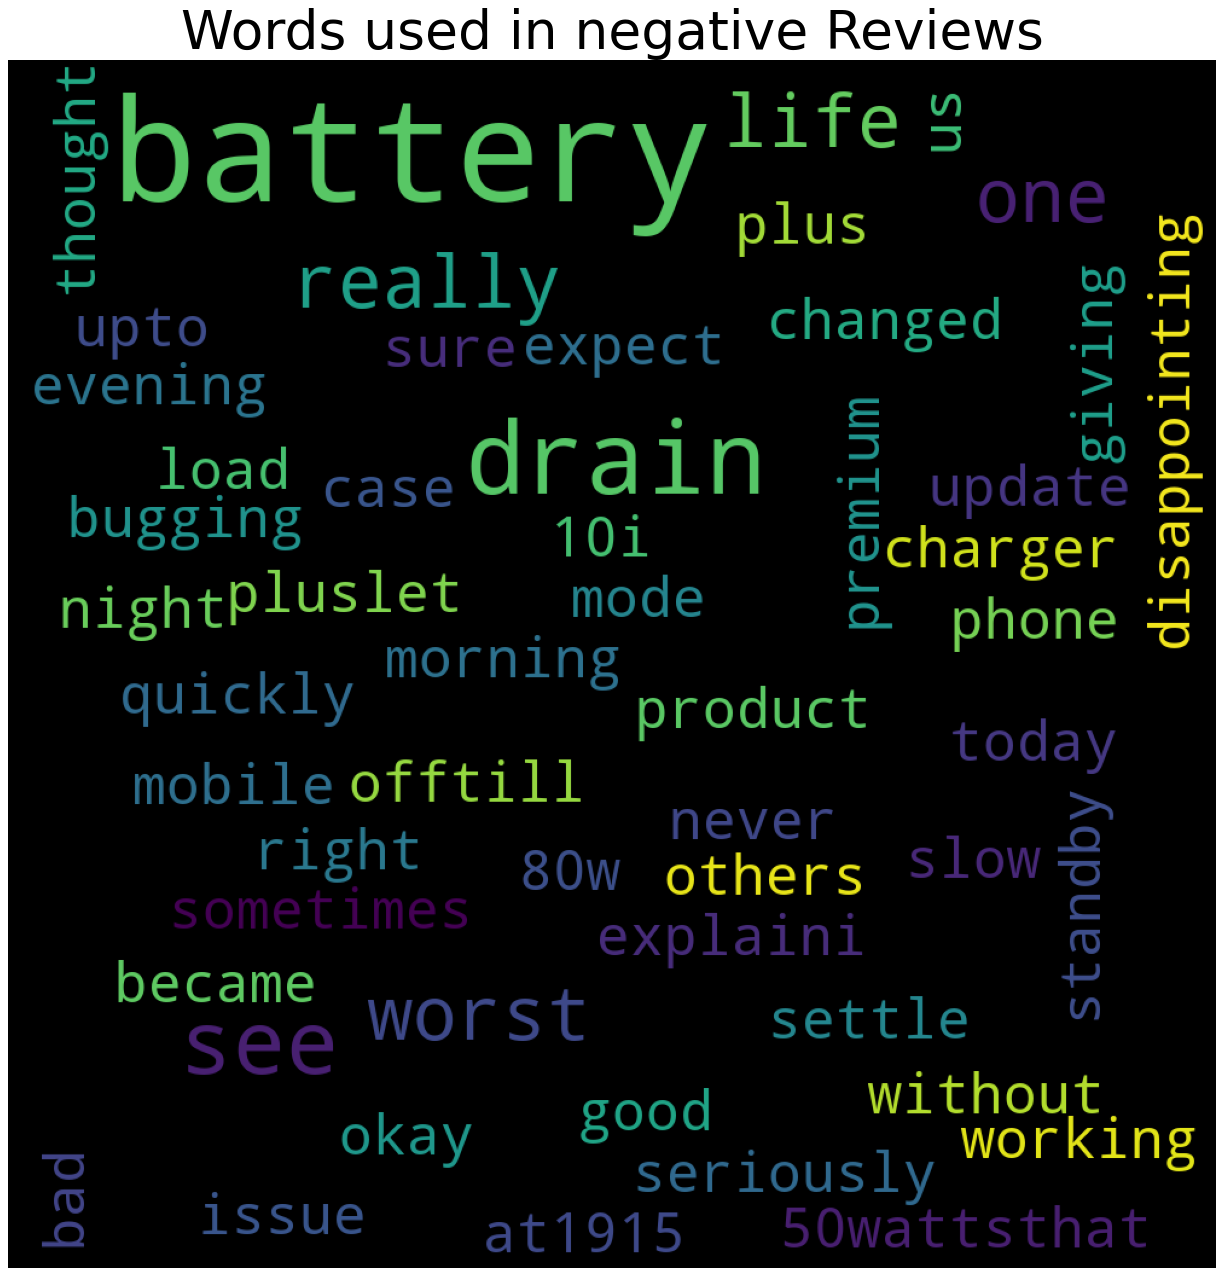

In [216]:
allwords = " ".join([txt for txt in df_sort[df_sort['score'] < 0]['Review']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.title('Words used in negative Reviews' , fontsize = 48)
plt.show()

## Model Building

### SVC

In [217]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.pipeline import Pipeline

In [218]:
vectorizer = CountVectorizer()
svc = LinearSVC()

In [219]:
vectorizer2 = CountVectorizer()
x = vectorizer.fit_transform(df['Review'])
x.toarray()
y = df['Analysis']

In [220]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= 0.20 , random_state= 42)

In [221]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((160, 1519), (40, 1519), (160,), (40,))

In [222]:
svc.fit(x_train , y_train)
y_pred = svc.predict(x_test)
pd.Series(y_pred).value_counts()

Positive    28
Neutral     11
Negative     1
dtype: int64

In [223]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [224]:
accuracy_score(y_pred , y_test)

0.8

#### Tuning Model

[0.787375415282392, 0.8898117386489478, 0.8744924326319676, 0.8901808785529717, 0.8820598006644519, 0.9056847545219638, 0.8981173864894796, 0.905684754521964, 0.905684754521964, 0.905684754521964, 0.905684754521964]


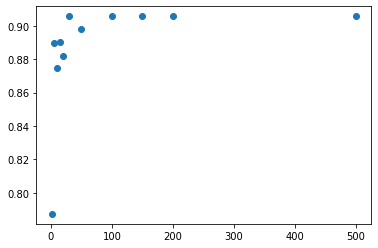

In [96]:
#K-fold cross validation should be used to tune the model
from sklearn.model_selection import cross_val_score

n = [1 ,5 ,10, 15, 20, 30, 50, 100, 150, 200, 500]
val_results = []

for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    val_results.append(cross_val_score(clf, x_train, y_train,cv=3).mean())
    
plt.scatter(n, val_results)
print(val_results)

### Logistic Regression

After training and testing the dataset, **Support Vector Classifier** has the **best result** compared to the other methods

### We have got 91% accuracy on predictions